In [1]:
from pandas import read_csv
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from matplotlib.pyplot import scatter


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import  SVR
from sklearn.compose import ColumnTransformer
from numpy import std
from numpy import absolute

from numpy import mean
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
 dataset=pd.read_csv("/train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...
364189,782,7,2014-08-17,0,0,0,0,0,0.0
364190,783,7,2014-08-17,0,0,0,0,0,0.0
364191,784,7,2014-08-17,0,0,0,0,0,0.0
364192,785,7,2014-08-17,0,0,0,0,0,0.0


#Copy dataset


In [ ]:
df=dataset.copy()
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...
364189,782,7,2014-08-17,0,0,0,0,0,0.0
364190,783,7,2014-08-17,0,0,0,0,0,0.0
364191,784,7,2014-08-17,0,0,0,0,0,0.0
364192,785,7,2014-08-17,0,0,0,0,0,0.0


In [ ]:
print("Shape of the Dataset:", df.shape)


Shape of the Dataset: (1017209, 9)


In [ ]:
df.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1.0
5,6,5,2015-07-31,5651,589,1,1,0,1.0
6,7,5,2015-07-31,15344,1414,1,1,0,1.0
7,8,5,2015-07-31,8492,833,1,1,0,1.0
8,9,5,2015-07-31,8565,687,1,1,0,1.0
9,10,5,2015-07-31,7185,681,1,1,0,1.0


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,364194.000000,364194.000000,364194.000000,364194.000000,364194.000000,364194.000000,364193.000000
mean,558.591567,3.993045,5958.738535,640.081094,0.830393,0.401434,0.165377
std,321.876580,1.998160,3926.472843,466.400485,0.375288,0.490189,0.371521
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,3893.000000,416.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5958.000000,618.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,8104.000000,844.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [ ]:
store= pd.read_csv("/store.csv")
store.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
print(store.shape)


(1115, 10)


In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
df_new.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
df_new

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_new=df.merge(store, on=["Store"], how="inner")
df_new


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364189,1115,5,2014-08-22,6585,433,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364190,1115,4,2014-08-21,7648,453,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364191,1115,3,2014-08-20,6228,396,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364192,1115,2,2014-08-19,6453,454,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
print("Distinct number of Stores :", len(df_new["Store"].
unique()))
print("Distinct number of Days :", len(df_new["Date"].
unique()))
print("Average daily sales of all stores : ",round(df_new 
["Sales"].mean(),2))


Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


NameError: ignored

In [ ]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
df_new["DayOfWeek"].value_counts()

5    52330
4    52330
3    52150
2    52150
1    52150
7    51869
6    51215
Name: DayOfWeek, dtype: int64

In [ ]:
#We can extract all date properties from a datetime datatype
df_new['Date']=pd.to_datetime(df_new['Date'],infer_datetime_format=True)
df_new['Month']=df_new['Date'].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
 np.where(df_new["Month"].isin([6,7,8]), 
"Summer",
 np.where(df_new["Month"].isin 
([9,10,11]),"Fall",
 np.where(df_new["Month"].isin 
([12,1,2]),"Winter","None"))))
#Using the head command to view (only) the data and the newly 
print(df_new[["Date","Year","Month","Day","Week","Quarter",
"Season"]].head())


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8bf3939d0>,
      dtype=object)

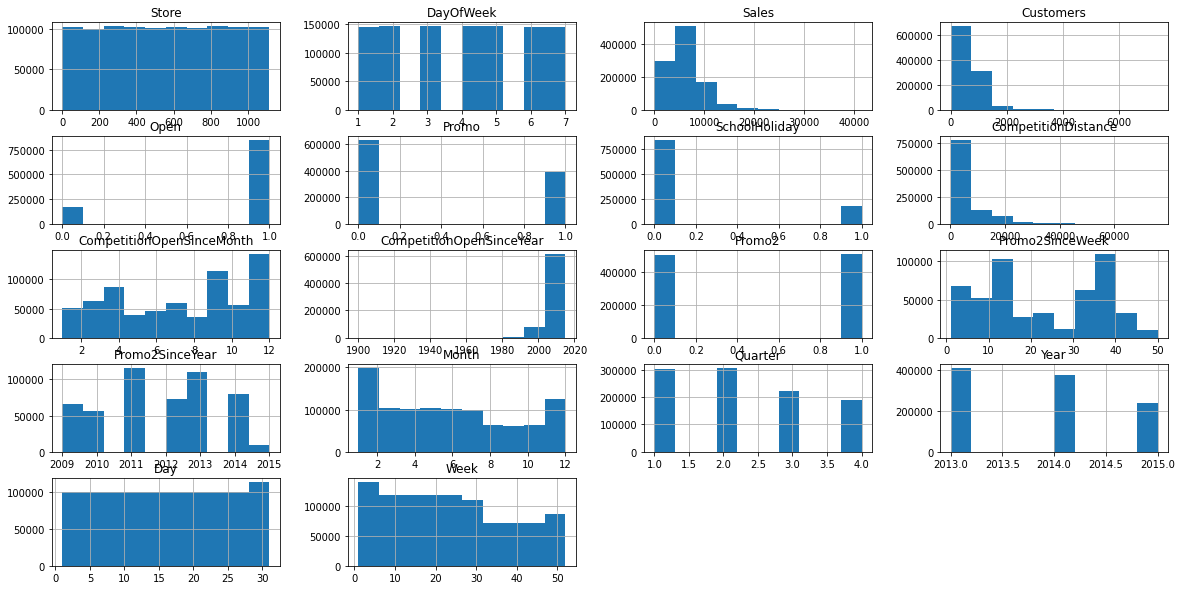

In [ ]:
# histograms
df_new.hist(figsize=(20,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eac306850>,
      dtype=object)

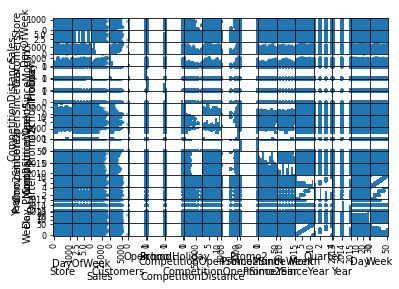

In [ ]:
pd.plotting.scatter_matrix(df_new)


In [ ]:
df_new.isnull().sum()/df.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000275
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.249867
CompetitionOpenSinceMonth    31.828915
CompetitionOpenSinceYear     31.828915
Promo2                        0.000000
Promo2SinceWeek              51.184808
Promo2SinceYear              51.184808
PromoInterval                51.184808
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [ ]:
#Replace nulls with the mode
df_new['CompetitionDistance'].fillna( df['CompetitionDistance'].mode()[0])


#Double check if we still see nulls for the column

KeyError: ignored

In [ ]:
sns.set(style="whitegrid")
#Create the bar plot for Average Sales across different seasons
ax=sns.barplot(x="Season",y="Sales", data=df_new)

In [ ]:
#Create the bar plot for Average Sales across different 
ax=sns.barplot(x="Assortment",y="Sales",data=df_new)

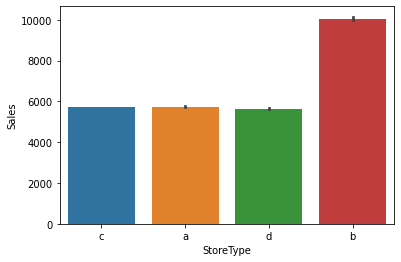

In [ ]:
#Create the bar plot for Average Sales across different Store 
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)


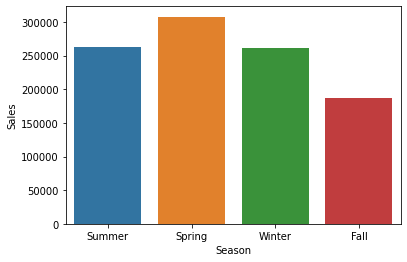

In [ ]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size)



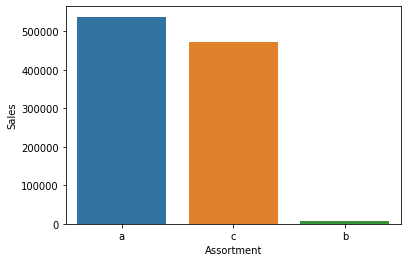

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=np.size)


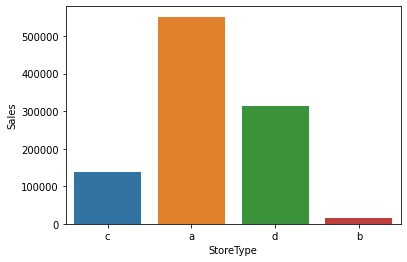

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, estimator=np.size)


Visualisation

In [ ]:
df.colums

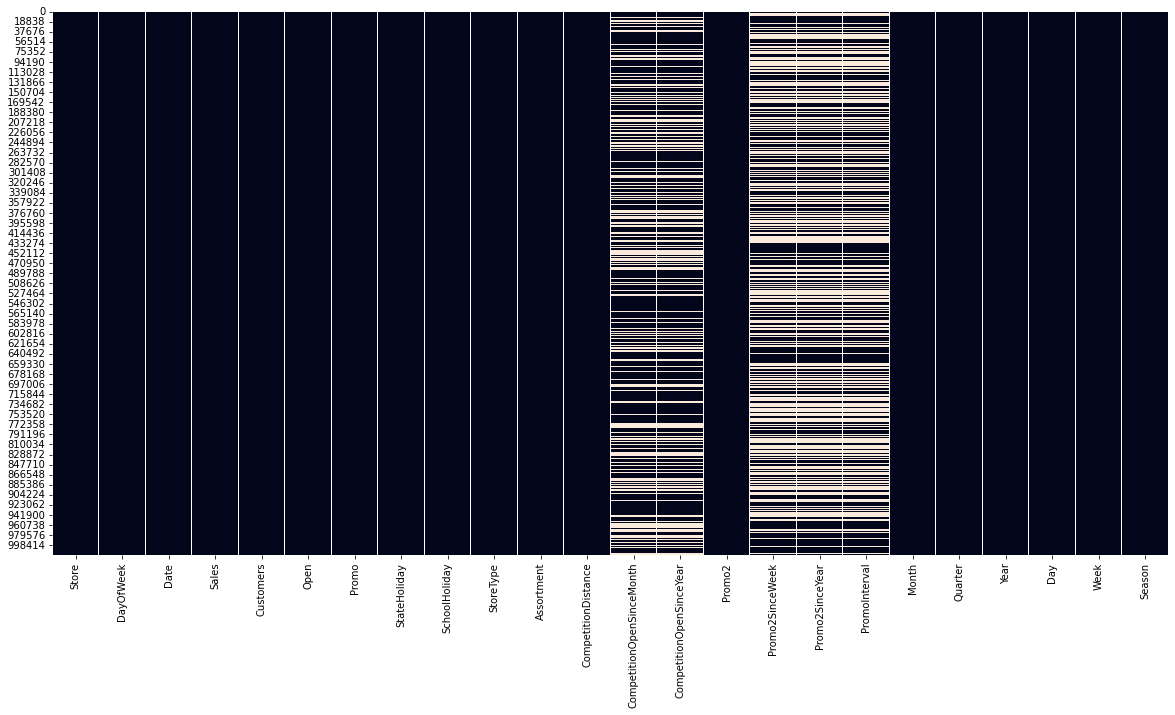

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.isna(),cbar=False)


In [ ]:
df_new.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Month                                 int64
Quarter                               int64
Year                                  int64
Day                                   int64
Week                            

In [ ]:
df_new['CompetitionDistance'].fillna(df_new['CompetitionDistance'].mode()[0], inplace= True)

In [ ]:
df_new.isnull().sum()/df.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df_new

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,30,31,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,29,31,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,28,31,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,3,2015,27,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364189,1115,5,2014-08-22,6585,433,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",8,3,2014,22,34,Summer
364190,1115,4,2014-08-21,7648,453,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",8,3,2014,21,34,Summer
364191,1115,3,2014-08-20,6228,396,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",8,3,2014,20,34,Summer
364192,1115,2,2014-08-19,6453,454,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",8,3,2014,19,34,Summer


In [ ]:
df_new= df.merge(store, on=["Store"], how="inner")
df_new


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364189,1115,5,2014-08-22,6585,433,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364190,1115,4,2014-08-21,7648,453,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364191,1115,3,2014-08-20,6228,396,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
364192,1115,2,2014-08-19,6453,454,1,1,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
data=df_new.values
#split into and ouputs
X = data[:, :-1].astype(str)
X = X.astype(str)



y= data[:,-1].astype(str)
#format aull fields
# summarize
print('Input', X.shape)
print('Output', y.shape)


NameError: ignored

In [ ]:

def prepress():
data=df_new.values
X = data[:, :-1].astype(str)
y = data[:, :-1].astype(str)
print('Input', X.shape)
print('Input', y.shape)
X, y =df.merge(store, on=["Store"], how="inner")

numerical_ix = df_new.select_dtypes(include=['int64', 'float64']).columns
oh= OneHotEncoder()
oh.fit_transform(categorical_ix)

categorical_ix = df_new.select_dtypes(include=['object', 'bool']).columns
return numerical_ix, categorical_ix 

In [ ]:
def prepare_input(X_train, X_test):

  oh= OneHotEncoder(sparse=False)
  oh.fit(X_train)
  X_tran_enc=oh.transform(X_train)
  X_test_enc=oh.transform(X_test)
  return  X_tran_enc,X_test_enc


In [ ]:
def prepare_target(y_train,  y_test): 
  le= LabelEncoder()
  le.fit(y_train)
  y_train_enc= le.transform(y_train)
  y_test_enc=le .tranform(y_test)
  return y_train_enc,y_test_enc


In [ ]:
#load dataset
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#prepare input data
X_tran_enc, X_test_enc=prepare_input(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)


In [ ]:
#split into and ouput
last_ix = len(df_new.columns) 
X, y = df_new.drop( last_ix, axis=1), df_new[last_ix]
print(X.shape, y.shape)


print(X.shape, y.shape)
#determine categorical and numerical features
numerical_ix=X.select_dtypes(include=['int64','float64']).columns
categorical_ix=X.select_dtypes(include=['object','bool']).columns
#define the data preparation for the columns
t=[('cat', OneHotEncoder(),categorical_ix),('num', MinMaxScaler(),numerical_ix)]
col_transform= ColumnTransformer(transformers=t)
#Define the model
model = SVR(kernel='rbf', gamma='scale',C=100)
#Define  the data preparation  and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform ),('m',model)])
#Define the model cross-validation configuration
cv = KFold(n_splits=10,shuffle=True, random_state=1)
#Evaluate  the pipeline using  crosss validation  and calculate MAE
scores=  cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
#Convert  MAE to posituve
scores= abs(scores)
#Summarize  the model performance 
print('MAE:%.3f (%.3f)' % (mean(scores), std(scores)))



KeyError: ignored

FileNotFoundError: ignored